In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import LabelEncoder # para realizar el Label Encoding 
from sklearn.preprocessing import OneHotEncoder  # para realizar el One-Hot Encoding

# Para evitar que salgan los warnings en jupyter
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Pair Programming Encoding

En el pair programming de hoy usaremos el set de datos que guardastéis en el pair programming de normalización y estandarización.

Vuestro set de datos debería tener al menos una variable categórica, el objetivo del pair programming de hoy:
- Hacer una códificación de la/las variables categóricas que tengáis en vuestro set de datos.
- Recordad que lo primero que deberéis hacer es decidir su vuestras variables tienen o no orden, para que en función de esto uséis una aproximación u otra.
- Guardad el dataframe, donde deberíais tener las variables estadandarizas, normalizadas y codificadas en un csv para usarlo en el próximo pairprogramming

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [17]:
df = pd.read_csv('datos/soci_econ_country_profiles_v6.csv', index_col=0)
df.head(2)

,country,Region,GDP_per_capita,Employment_Agriculture,Employment_Services,Agricultural_production_index,Urban_population,Urban_population_growth_rate,Fertility_rate_total,Infant_mortality_rate,Seats_held_by_women_in_national_parliaments,Individuals_using_the_Internet,Energy_production_primary,Energy_supply_per_capita,Quality_Of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Property_price_to_income_ratio,Traffic_commute_time_index,Pollution_index,Climate_index,Affordability_Index,Cost_Of_Living_Index,Consumer_price_index,Current_health_expenditure,Human_capital_index,Inflation_consumer_prices,Life_expectancy_at_birth_total,Labour_force_participation,Pop_using_improved_drinking_water_urban,Pop_using_improved_drinking_water_rural,Population_age_distribution_0_14,Population_age_distribution_60_mas,Education_Secondary_gross_enrol_ratio,Education_Tertiary_gross_enrol_ratio
0,Argentina,SouthAmerica,-0.431499,-0.793293,0.635685,0.451515,1.176545,-0.146278,0.816818,0.390527,1.373669,-0.170271,-0.433123,-0.072257,139.59,-0.480096,-1.843490,0.739348,0.085614,0.253993,0.085118,1.031920,-1.242902,-0.124619,-0.375346,0.595817,-0.661735,-0.179334,-0.356054,0.526225,0.213117,0.576120,0.983668,-0.481642,0.119029,0.928674
1,Australia,Oceania,1.358804,-0.729591,0.874487,-0.051041,1.039907,0.271660,0.093270,-0.510644,0.436646,1.674834,0.729295,0.579071,176.54,1.024540,-0.270524,0.839394,-0.461542,-0.207625,-1.254411,0.556493,0.080872,1.230619,-0.300239,0.626171,1.061166,-0.270570,1.069555,0.052782,0.675804,0.681506,-0.044663,0.256053,1.643795,1.272043


In [4]:
df["Region"].unique()

array(['SouthAmerica', 'Oceania', 'WesternEurope', 'EasternEurope',
       'SouthernEurope', 'NorthernAmerica', 'EasternAsia', 'WesternAsia',
       'NorthernEurope', 'NorthernAfrica', 'SouthernAsia',
       'South-easternAsia', 'CentralAmerica', 'SouthernAfrica'],
      dtype=object)

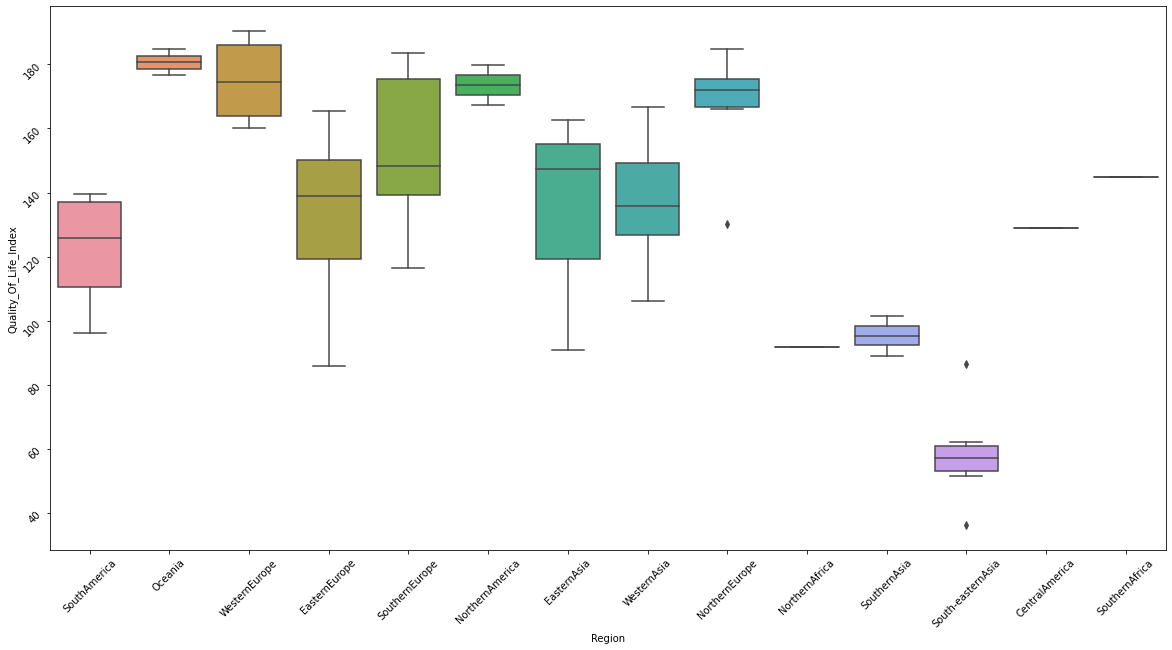

In [6]:
plt.figure(figsize = (20, 10))
sns.boxplot(x= "Region", y = "Quality_Of_Life_Index", data = df)
plt.tick_params(rotation = 45);

In [8]:
df_grupo1 = df[df["Region"].isin(["Oceania", "WesternEurope", "NorthernAmerica", "NorthernEurope"])]
media_QOL_1 = df_grupo1["Quality_Of_Life_Index"].mean()

In [9]:
df_grupo2 = df[df["Region"].isin(["SouthAmerica", "EasternEurope", "SouthernEurope", "EasternAsia", "WesternAsia", "CentralAmerica", "SouthernAfrica"])]
media_QOL_2 = df_grupo2["Quality_Of_Life_Index"].mean()

In [10]:
df_grupo3 = df[df["Region"].isin(["NorthernAfrica", "SouthernAsia", "South-easternAsia"])]
media_QOL_3 = df_grupo3["Quality_Of_Life_Index"].mean()

In [ ]:
media_QOL_1 / media_QOL_2

1.2510430874236744

In [ ]:
media_QOL_1 / media_QOL_3

2.3052043139620717

In [ ]:
media_QOL_2 / media_QOL_3

1.8426258353013851

In [ ]:
print(media_QOL_1) #2.3
print(media_QOL_2) #1.84
print(media_QOL_3) #1

172.52777777777774
137.90714285714287
74.84272727272729


In [18]:
mapa_region = {'SouthAmerica' : '1.84',
                'Oceania' : '2.3',
                'WesternEurope' : '2.3',
                'EasternEurope' : '1.84',
                'SouthernEurope' : '1.84',
                'NorthernAmerica' : '2.3',
                'EasternAsia' : '1.84',
                'WesternAsia' : '1.84',
                'NorthernEurope' : '2.3',
                'NorthernAfrica' : '1',
                'SouthernAsia' : '1',
                'South-easternAsia' : '1',
                'CentralAmerica' : '1.84',
                'SouthernAfrica' : '1.84',}

In [19]:
df['Region'] = df['Region'].map(mapa_region)

In [20]:
df.head(2)

,country,Region,GDP_per_capita,Employment_Agriculture,Employment_Services,Agricultural_production_index,Urban_population,Urban_population_growth_rate,Fertility_rate_total,Infant_mortality_rate,Seats_held_by_women_in_national_parliaments,Individuals_using_the_Internet,Energy_production_primary,Energy_supply_per_capita,Quality_Of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Property_price_to_income_ratio,Traffic_commute_time_index,Pollution_index,Climate_index,Affordability_Index,Cost_Of_Living_Index,Consumer_price_index,Current_health_expenditure,Human_capital_index,Inflation_consumer_prices,Life_expectancy_at_birth_total,Labour_force_participation,Pop_using_improved_drinking_water_urban,Pop_using_improved_drinking_water_rural,Population_age_distribution_0_14,Population_age_distribution_60_mas,Education_Secondary_gross_enrol_ratio,Education_Tertiary_gross_enrol_ratio
0,Argentina,1.84,-0.431499,-0.793293,0.635685,0.451515,1.176545,-0.146278,0.816818,0.390527,1.373669,-0.170271,-0.433123,-0.072257,139.59,-0.480096,-1.843490,0.739348,0.085614,0.253993,0.085118,1.031920,-1.242902,-0.124619,-0.375346,0.595817,-0.661735,-0.179334,-0.356054,0.526225,0.213117,0.576120,0.983668,-0.481642,0.119029,0.928674
1,Australia,2.3,1.358804,-0.729591,0.874487,-0.051041,1.039907,0.271660,0.093270,-0.510644,0.436646,1.674834,0.729295,0.579071,176.54,1.024540,-0.270524,0.839394,-0.461542,-0.207625,-1.254411,0.556493,0.080872,1.230619,-0.300239,0.626171,1.061166,-0.270570,1.069555,0.052782,0.675804,0.681506,-0.044663,0.256053,1.643795,1.272043


In [21]:
df.set_index('country', inplace=True)
df.head(3)

,Region,GDP_per_capita,Employment_Agriculture,Employment_Services,Agricultural_production_index,Urban_population,Urban_population_growth_rate,Fertility_rate_total,Infant_mortality_rate,Seats_held_by_women_in_national_parliaments,Individuals_using_the_Internet,Energy_production_primary,Energy_supply_per_capita,Quality_Of_Life_Index,Purchasing_Power_Index,Safety_Index,Health_Care_Index,Property_price_to_income_ratio,Traffic_commute_time_index,Pollution_index,Climate_index,Affordability_Index,Cost_Of_Living_Index,Consumer_price_index,Current_health_expenditure,Human_capital_index,Inflation_consumer_prices,Life_expectancy_at_birth_total,Labour_force_participation,Pop_using_improved_drinking_water_urban,Pop_using_improved_drinking_water_rural,Population_age_distribution_0_14,Population_age_distribution_60_mas,Education_Secondary_gross_enrol_ratio,Education_Tertiary_gross_enrol_ratio
country,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Argentina,1.84,-0.431499,-0.793293,0.635685,0.451515,1.176545,-0.146278,0.816818,0.390527,1.373669,-0.170271,-0.433123,-0.072257,139.59,-0.480096,-1.843490,0.739348,0.085614,0.253993,0.085118,1.031920,-1.242902,-0.124619,-0.375346,0.595817,-0.661735,-0.179334,-0.356054,0.526225,0.213117,0.576120,0.983668,-0.481642,0.119029,0.928674
Australia,2.3,1.358804,-0.729591,0.874487,-0.051041,1.039907,0.271660,0.093270,-0.510644,0.436646,1.674834,0.729295,0.579071,176.54,1.024540,-0.270524,0.839394,-0.461542,-0.207625,-1.254411,0.556493,0.080872,1.230619,-0.300239,0.626171,1.061166,-0.270570,1.069555,0.052782,0.675804,0.681506,-0.044663,0.256053,1.643795,1.272043
Austria,2.3,1.006731,-0.547584,0.365043,-0.239499,-0.292313,-0.647804,-0.811165,-0.565818,0.611189,-0.538225,0.186268,0.579071,190.37,0.807519,1.532822,1.540764,-0.380339,-1.420448,-1.379278,0.273045,0.414798,0.789648,-0.345498,1.068892,0.971432,-0.238703,0.870393,-0.574209,0.675804,0.681506,-0.898700,0.796151,-0.222299,0.863591


In [22]:
df.to_csv('datos/soci_econ_country_profiles_v7.csv')